# **Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


# **Load CIFAR-10 dataset**

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# **Normalize pixel values to be in the range [0, 1]**

In [3]:
# Normalize pixel values to be in the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# **CNN model**

In [4]:
# Create a CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Use softmax activation for multiclass classification
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for multiclass classification
                  metrics=['accuracy'])

# Print a summary of the model architecture
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

# **Train and Evaluate Model**

In [11]:
# Train the CNN model
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the CNN model
test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"CNN Test Accuracy: {test_acc}")

Epoch 1/20
1563/1563 [==============================] - 87s 55ms/step - loss: 1.4748 - accuracy: 0.4688 - val_loss: 1.2183 - val_accuracy: 0.5761
Epoch 2/20
1563/1563 [==============================] - 76s 48ms/step - loss: 1.1195 - accuracy: 0.6065 - val_loss: 1.0295 - val_accuracy: 0.6441
Epoch 3/20
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9817 - accuracy: 0.6583 - val_loss: 1.0321 - val_accuracy: 0.6430
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8909 - accuracy: 0.6914 - val_loss: 0.9242 - val_accuracy: 0.6818
Epoch 5/20
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8202 - accuracy: 0.7154 - val_loss: 0.9480 - val_accuracy: 0.6729
Epoch 6/20
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7682 - accuracy: 0.7342 - val_loss: 0.8781 - val_accuracy: 0.6996
Epoch 7/20
1563/1563 [==============================] - 73s 46ms/step - loss: 0.7165 - accuracy: 0.7522 - val_loss: 0.9210 -

# **Plot Graphs**

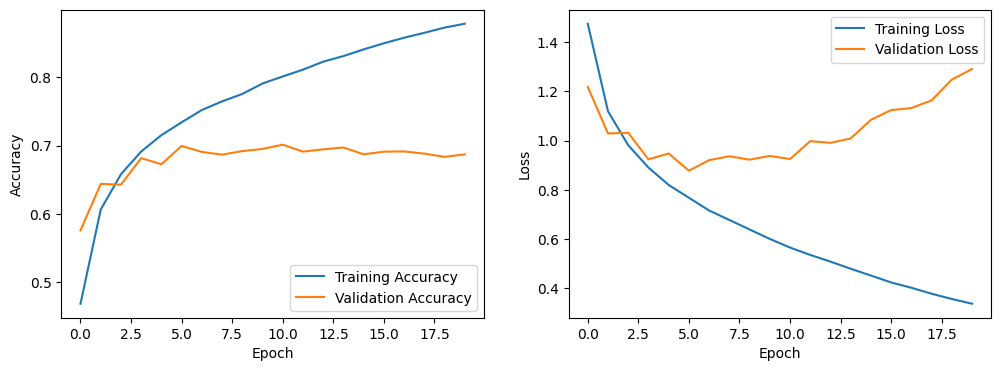

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
